# Wrangle and Analyze Data

Introduction

The project is about wrangling and analyzing the data of the tweet archive WeRateDog account. Using python we should gather the data from multiple sources to assess, clean, and visualize our insights. We will gather three different file formats using Request, Tweepy, and Pandas libraries. After gathering the data we should assess in terms of the quality and tidiness and make sure to clean the data before visualizing and reporting.

Project Steps:
</br> 1. Gathering Data
</br> 2. Assessing Data
</br> 3. Cleaning Data
</br> 4. Storing Data
</br> 5. Analyzing and Visualizing
</br> 6. Reporting

## Step 1: Gathering Data

* import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from functools import reduce
import functools as ft
from tweepy import OAuthHandler
from timeit import default_timer as timer

    1) twitter-archive-enhanced

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


    2) image-predictions

In [4]:
url = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(url.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


    3) tweet json

In [6]:
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

#count = 0
#fails_dict = {}
#start = timer()

#with open('tweet_json.txt', 'w') as outfile:

#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#           json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
json_dict = []
with open('tweet_json.txt') as f:
    for line in f:
        json_dict.append(json.loads(line))
tweet_json = pd.DataFrame.from_dict(json_dict)

In [8]:
tweet_json = tweet_json[['id','retweet_count','favorite_count']]

In [9]:
tweet_json.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


## Step 2: Assessing Data

#### 8 data quality Issues
###### 1) Remove the unnecessary data:
Removing retweets and replies from the dataset and select only three columns from JSON file.
###### 2) Invalid Data Entry:
* I found not working URLs and incorrect dog names.
* There is an issue with the dog names, some of them are incorrect and consist of 1-3 lowercase letters.

###### 3) Duplicate Data:
I found duplicate data in both twitter_archive and image_predictions on the expanded_urls and jpg_url columns.
###### 4) Outliers:
I've noticed outliers in the rating_numerator after I visualize the column using a boxplot.
###### 5) Data Type:
I found issues with the Id int data type and the timestamp.
###### 6) Column naming:
id in JSON file should be tweet_id like the other files

###### 7) Replace characters and change format
* I've noticed that the values on the predictions columns are written with an underscore instead of using a space.
* The urls that indicate the source 

###### 8) Missing/null
Detect null values in twitter archive

#### 2 data tidiness Issues

##### 1) Merge data frames
We should work with one dataset and merge the three files (twitter_archive, image_predictions, tweet_json)

##### 2) Merge columns
Its better to combine (doggo, floofer, pupper, puppo) columns into one (called Type column)

### Quality Issues

##### 1) Remove the unnecessary data:
Below are the columns that contain reply and retweet:
* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp

In [10]:
#count null values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### 2) Invalid Data Entry:
- I found some of the urls are not working https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1  
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1 https://twitter.com/dog_rates/status/764259802650378240/photo/1,https://twitter.com/dog_rates/status/764259802650378240/photo/1

- There is an issue with the dog names, some of them are incorrect and consist of 1-3 lower case letters.

In [11]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [12]:
twitter_archive[twitter_archive['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name']

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 824, dtype: object

##### 3) Duplicate Data:
I found duplicate data in both twitter_archive and image_predictions on the expanded_urls and jpg_url columns

In [13]:
twitter_archive['expanded_urls'].duplicated().sum()

137

In [14]:
image_predictions['jpg_url'].duplicated().sum()

66

##### 4) Outliers:
I've noticed outliers in the rating_numerator after I visualize the column using a boxplot.

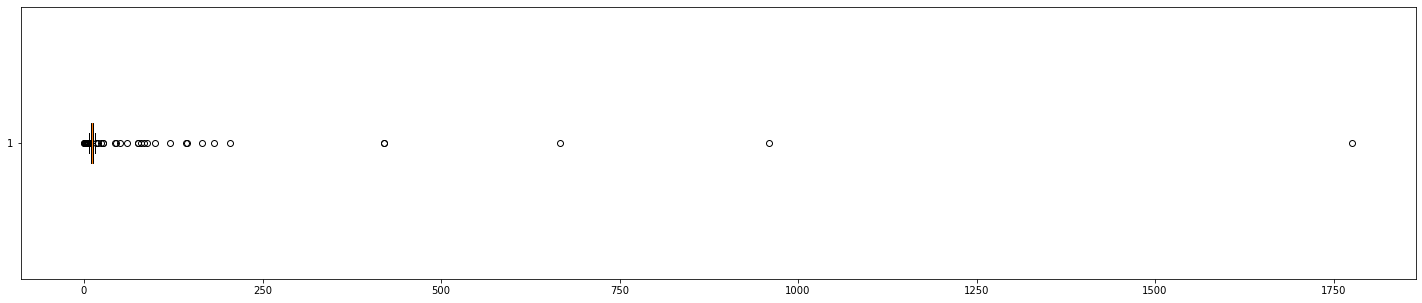

In [15]:
fig = plt.figure(figsize = (25, 5))

plt.boxplot(twitter_archive['rating_numerator'],vert=False)

plt.show()

##### 5) Data Type:
I found issues with the Id int data type and the timestamp

In [16]:
np.dtype(twitter_archive['tweet_id'])

dtype('int64')

In [17]:
np.dtype(image_predictions['tweet_id'])

dtype('int64')

In [18]:
np.dtype(tweet_json['id'])

dtype('int64')

In [19]:
np.dtype(twitter_archive['timestamp'])

dtype('O')

##### 6) Column naming:
id in JSON file should be tweet_id like the other files

In [20]:
tweet_json.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

###### 7) Replace characters and change format
* I've noticed that the values on the predictions columns are written with an underscore instead of using a space.
* The urls of the source column

In [21]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [22]:
twitter_archive['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

###### 8) Missing/null
Detect null values in twitter archive

In [23]:
twitter_archive.isnull().values.any()

True

### Tidiness Issues

##### 1) Merge data frames
We should work with one dataset and merge the three files (twitter_archive, image_predictions, tweet_json)

##### 2) Merge columns
Its better to combine (doggo, floofer, pupper, puppo) columns into one (called Type column)

## Step 3: Cleaning Data

##### Copy the dataframes before cleaning

In [24]:
twitter_archive_clean = twitter_archive.copy()

In [25]:
image_predictions_clean = image_predictions.copy()

In [26]:
tweet_json_clean = tweet_json.copy()

### Quality Issues

#### Issue 1:

##### Define

1) Remove the unnecessary data:
I removed retweets and replies from the dataset and RT@ to keep only original tweets.

##### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['text'].str.contains("RT") == False]


##### Test

In [28]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains("RT") == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Code

In [29]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

###### Test

In [30]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue 2:

##### Define:

2) Invalid Data Entry:
drop urls and in correct dog names

##### Code:

In [31]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name'].index, inplace = True)

##### Test

In [32]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Nelly', 'Ginger',
       'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo',
       'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco',
       'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle',
       'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt'

#### Issue 3:

##### Define:

3) Duplicate Data:
I dropped duplicate in the expanded_urls and jpg_url columns.

##### Code

In [33]:
#remove duplicate
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

##### Test

In [34]:
#check duplication
twitter_archive_clean.duplicated().sum()

0

##### Code

In [35]:
#remove duplicate
image_predictions_clean = image_predictions_clean.drop_duplicates()

##### Test

In [36]:
#check duplication
image_predictions_clean.duplicated().value_counts()

False    2075
dtype: int64

#### Issue 4:

##### Define:

4) Outliers:
I've noticed outliers in the rating_numerator after I visualize the column using a boxplot. I used IQR to remove the outlier.

##### Code:

In [37]:
# use describe function to find Q1 = 25% and Q3 = 75%
twitter_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.415000e+03,1415.000000,1415.000000
mean,7.435030e+17,12.202827,10.139929
std,6.806671e+16,47.286906,4.384483
min,6.660586e+17,2.000000,7.000000
25%,6.801839e+17,10.000000,10.000000
50%,7.226134e+17,11.000000,10.000000
75%,7.978775e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [38]:
#calculate IQR
Q1 = 10.000000
Q3 = 12.000000
IQR= Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [39]:
twitter_archive_clean = twitter_archive_clean.loc[(twitter_archive_clean['rating_numerator'] > lower_limit) & 
                                  (twitter_archive_clean['rating_numerator'] < upper_limit)]

##### Test:

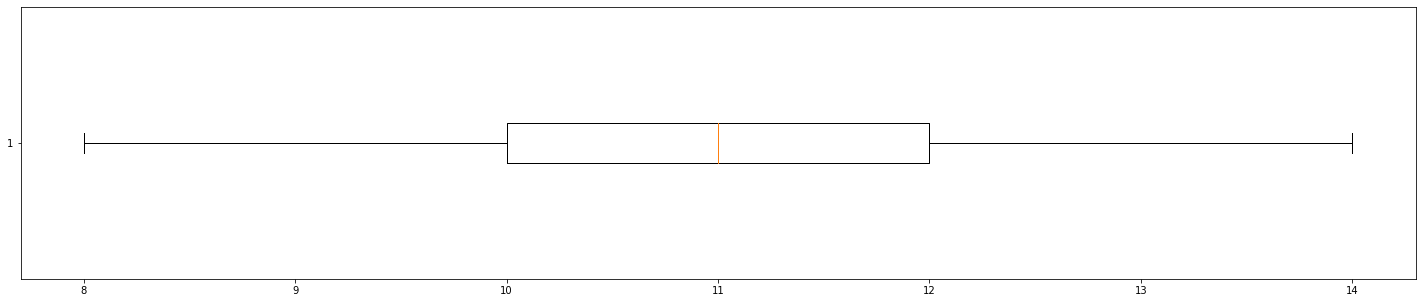

In [40]:
#check outlires using boxplot
fig = plt.figure(figsize = (25, 5))
plt.boxplot(twitter_archive_clean['rating_numerator'],vert=False)
plt.show()

#### Issue 5:

##### Define:

5) Data Type:
I found data type issues with the Id int data type and the timestamp and covert them using astype and date time functions.

##### Code:

In [41]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

##### Test:

In [42]:
#check data type
twitter_archive_clean['tweet_id'].dtype

dtype('O')

##### Code:

In [43]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')  

##### Test:

In [44]:
#check data type
image_predictions_clean['tweet_id'].dtype

dtype('O')

##### Code:

In [45]:
tweet_json_clean['id'] = tweet_json_clean['id'].astype('str')

##### Test:

In [46]:
#check data type
tweet_json_clean['id'].dtype

dtype('O')

##### Code:

In [47]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test:

In [48]:
#check data type
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

#### Issue 6:

##### Define:

6) Column naming:
id in JSON file should be tweet_id like the other files

##### Code:

In [49]:
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

##### Test:

In [50]:
#check the name
tweet_json_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


#### Issue 7:

##### Define:

7) Replace characters and change format:
Replace the underscore with spaces in P1, P2, P3 and remove the characters from the source urls.

##### Code:

In [51]:
image_predictions_clean['p1'].replace('_',' ',regex=True,inplace = True)
image_predictions_clean['p2'].replace('_',' ',regex=True,inplace = True)
image_predictions_clean['p3'].replace('_',' ',regex=True,inplace = True)

##### Test:

In [52]:
#check the values after replacing
image_predictions_clean['p1'].unique()

array(['Welsh springer spaniel', 'redbone', 'German shepherd',
       'Rhodesian ridgeback', 'miniature pinscher',
       'Bernese mountain dog', 'box turtle', 'chow', 'shopping cart',
       'miniature poodle', 'golden retriever', 'Gordon setter',
       'Walker hound', 'pug', 'bloodhound', 'Lhasa', 'English setter',
       'hen', 'desktop computer', 'Italian greyhound', 'Maltese dog',
       'three-toed sloth', 'ox', 'malamute', 'guinea pig',
       'soft-coated wheaten terrier', 'Chihuahua',
       'black-and-tan coonhound', 'coho', 'toy terrier',
       'Blenheim spaniel', 'Pembroke', 'llama',
       'Chesapeake Bay retriever', 'curly-coated retriever', 'dalmatian',
       'Ibizan hound', 'Border collie', 'Labrador retriever', 'seat belt',
       'snail', 'miniature schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw puzzle', 'West Highland white terrier',
       'toy poodle', 'giant schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian husky', 't

##### Code:

In [53]:
#replace
twitter_archive_clean['source'] = twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\wmangl\AppData\Local\Temp\ipykernel_2864\3694680748.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['source'] = twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


In [54]:
#convert type
twitter_archive_clean['source']  = twitter_archive_clean.source.astype('category')

##### Test:

In [55]:
#check the values
twitter_archive_clean['source'] .value_counts()

Twitter for iPhone     1258
Vine - Make a Scene      44
Twitter Web Client       16
TweetDeck                 7
Name: source, dtype: int64

#### Issue 8:

##### Define:

8) Missing/null:
Detect null values in twitter archive and remove them

##### Code:

In [56]:
twitter_archive_clean = twitter_archive_clean.dropna(axis=1)

##### Test:

In [57]:
twitter_archive_clean.isnull().values.any()

False

### Tidiness Issues

#### Issue 1:

##### Define:

1) Merge columns:
Its better to combine (doggo, floofer, pupper, puppo) columns into one (called Type column)

##### Code:

In [58]:
#new column (types) with category data type
twitter_archive_clean['types'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
twitter_archive_clean['types'] = twitter_archive_clean['types'].astype('category')

In [59]:
#remove the 4 columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [60]:
#check the columns
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'types'],
      dtype='object')

In [61]:
twitter_archive_clean['types'].replace('None', np.nan, inplace = True)

##### Test:

In [62]:
#check the values
twitter_archive_clean['types'].value_counts()

pupper     123
doggo       38
puppo       16
floofer      5
Name: types, dtype: int64

#### Issue 2:

##### Define:

2) Merge data frames: 
We should work with one dataset and merge the three files (twitter_archive, image_predictions, tweet_json)

##### Code:

In [63]:
dogs_dataset = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'inner', on = ['tweet_id'] )

In [64]:
dogs_dataset = pd.merge(dogs_dataset, tweet_json_clean, how = 'inner', on = ['tweet_id'])

##### Test:

In [65]:
dogs_dataset.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048


## Step 4: Storing Data

* Save the last updated df to the CSV

In [66]:
 dogs_dataset.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyzing and Visualizing (insights)

In [67]:
#read the CSV file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [68]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048


### What is the popular source used?

Twitter for IPhone is the most popular source

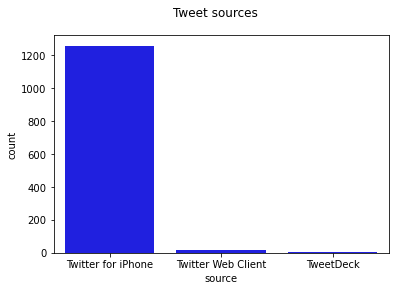

In [69]:
p = sns.countplot(data=twitter_archive_master, x='source', color = "Blue")
p.figure.suptitle('Tweet sources');

### What are the top 5 popular dog names?

The top five names are Cooper, Lucy, Penny, Tucker, and Oliver

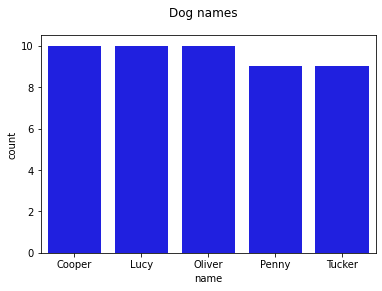

In [70]:
p = sns.countplot(data=twitter_archive_master, x='name', color = "Blue",
                  order=twitter_archive_master['name'].value_counts()[1:6].index)
p.figure.suptitle('Dog names');


### What is the popular dog type?

According to the count plot the Pupper is the popular dog type

In [71]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'types', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

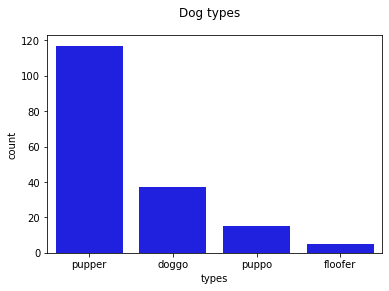

In [72]:
p = sns.countplot(data=twitter_archive_master, x='types', color = "Blue",
                  order=twitter_archive_master['types'].value_counts().index)
p.figure.suptitle('Dog types');

### What are the high and low ratings?

highst rating is 13 (total = 176), and lowest rating is 8 (total = 72)

In [73]:
twitter_archive_master['rating_numerator'].value_counts()

12    332
11    302
10    275
13    176
9     103
8      72
14     19
Name: rating_numerator, dtype: int64

In [74]:
twitter_archive_master['rating_numerator'].mean()

11.034401876465989

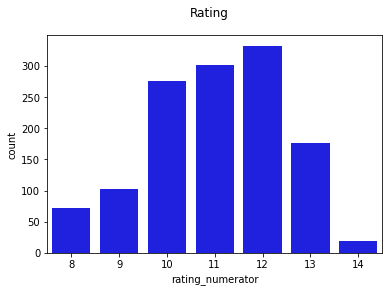

In [75]:
p = sns.countplot(data=twitter_archive_master, x='rating_numerator', color = "Blue")
p.figure.suptitle('Rating');

### What is the relation between favorite and retweet?

Strong positive correlation between favorit count and retweet count

In [76]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.9217200647889134

Positively skewed distribution, the data for both are clustered on the left

Text(0.5, 1.0, 'Retweet and Favorite Count')

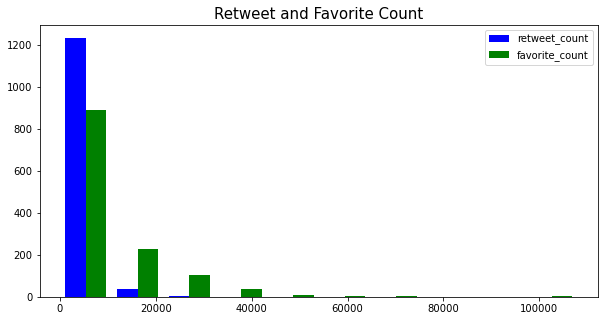

In [77]:
plt.figure(figsize=(10,5))

plt.hist([twitter_archive_master.retweet_count, twitter_archive_master.favorite_count], 
         color= ['blue', 'green'], label= ['retweet_count', 'favorite_count'])

plt.legend(loc='upper right', fontsize = 10)
plt.title('Retweet and Favorite Count', size = 15)